<a href="https://colab.research.google.com/github/victorknox/rude-mood/blob/main/Rude_Mood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

# Phase-1: Efficiency of the Politeness Classifier

In [1]:
import pandas as pd
classifier_data = pd.read_csv('classified_comments.csv')
print(classifier_data.head())

FileNotFoundError: ignored

In [12]:
annotated_data = pd.read_csv('annotated_comments.csv')
print(annotated_data.head())

                                               title  ... politeness score
0  If you want to run the Windows 11 build native...  ...              1.0
1  If you want to run the Windows 11 build native...  ...              0.0
2  If you want to run the Windows 11 build native...  ...              2.0
3  If you want to run the Windows 11 build native...  ...              1.0
4  If you want to run the Windows 11 build native...  ...             -1.0

[5 rows x 6 columns]


In [ ]:
df = pd.read_csv('annotated_comments.csv')
score = df['politeness score']
x = ['-2','-1','0','1','2']
y = [0,0,0,0,0]
for i in score:
  if(i >= -2 and i<= 2):
    index=int(i)
    y[index+2]=y[index+2]+1
  
# print(x)
# print(y)
import matplotlib.pyplot as plt
plt.bar(x,y)

In [13]:
body1 = classifier_data["text"]
body2 = annotated_data["body"]
scores1 = classifier_data["prediction"]
scores2 = annotated_data["politeness score"]

In [14]:
print(len(body1), len(body2))

157 169


In [25]:
count = 0
correct = 0
for i in range(len(body1)):
  for j in range(len(body2)):
    if(body1[i] == body2[j] and (scores1[i] - scores2[j]) > -10):
      if(scores2[j] >= 0 and scores1[i] == 0):
        correct += 1
      elif(scores2[j] <= 0 and scores1[i] == 1):
        correct += 1
      count += 1

print(correct, count)
print("Accuracy = ", end =" " )
print(correct/count)

132 158
Accuracy =  0.8354430379746836


# Phase-2: Politeness and Group Identity

In [8]:
import pandas as pd
win_data = pd.read_csv('win_results.csv')
print(win_data.head())

                                                text  prediction     score
0  If you're on AMD turn on FTPM in the bios on y...           0  0.331031
1  Y'all just raw dogging a beta OS on your main ...           0  0.270393
2  Be sure to check out our other subreddit /r/Wi...           0  0.217292
3  You do not need TPM to clean install, but the ...           0  0.230732
4  Well I'm screwed need a new Motherboard and CP...           0  0.322701


In [9]:
lin_data = pd.read_csv('lin_results.csv')
print(lin_data.head())

                                                text  prediction     score
0  It _can_ run on most phones, but requires a lo...           0  0.280605
1  Two reasons. Most phones have locked boot load...           0  0.170371
2  Most android devices run on downstream kernels...           0  0.249747
3  Phone kernels are very far downstream from mai...           0  0.190903
4  It's more accurate to say you can run the same...           0  0.144272


In [44]:
win_scores = win_data["prediction"]
lin_scores = lin_data["prediction"]

lin_polite = 0
for i in lin_scores:
  if i == 0:
    lin_polite += 1

win_polite = 0
for i in win_scores:
  if i == 0:
    win_polite += 1

print("Linux: ")
print("Polite comments = " + str(lin_polite))
print("Impolite comments = " + str(len(lin_scores) - lin_polite))
print("Percentage of Polite comments =" + str(lin_polite/(len(lin_scores))))
print()
print("Windows: ")
print("Polite comments = " + str(win_polite))
print("Impolite comments = " + str(len(win_scores) - win_polite))
print("Percentage of Polite comments =" + str(win_polite/(len(win_scores))))

Linux: 
Polite comments = 1413
Impolite comments = 363
Percentage of Polite comments =0.7956081081081081

Windows: 
Polite comments = 1444
Impolite comments = 332
Percentage of Polite comments =0.8130630630630631


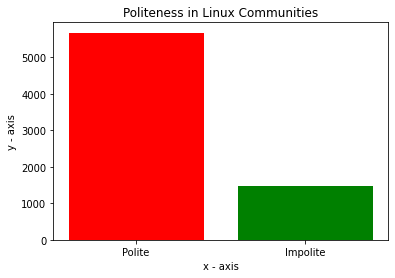

In [36]:
import matplotlib.pyplot as plt
 
# x-coordinates of left sides of bars
left = [1, 2]
 
# heights of bars
height = [lin_polite, len(lin_scores) - lin_polite]
 
# labels for bars
tick_label = ['Polite', 'Impolite']
 
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'green'])
 
# naming the x-axis
plt.xlabel('x - axis')
# naming the y-axis
plt.ylabel('y - axis')
# plot title
plt.title('Politeness in Linux Communities')
 
# function to show the plot
plt.show()

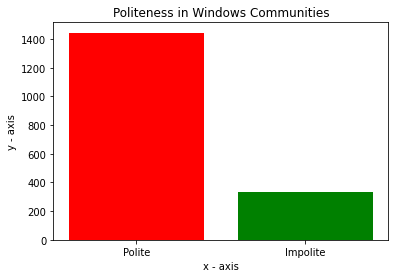

In [37]:
import matplotlib.pyplot as plt
 
# x-coordinates of left sides of bars
left = [1, 2]
 
# heights of bars
height = [win_polite, len(win_scores) - win_polite]
 
# labels for bars
tick_label = ['Polite', 'Impolite']
 
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'green'])
 
# naming the x-axis
plt.xlabel('x - axis')
# naming the y-axis
plt.ylabel('y - axis')
# plot title
plt.title('Politeness in Windows Communities')
 
# function to show the plot
plt.show()

# Phase-3: Politeness and Social Status

## Data collection

In [2]:
!pip install praw

In [3]:
import pandas as pd
win_data = pd.read_csv('win_results.csv')
print(win_data.head())
lin_data = pd.read_csv('lin_results.csv')
print(lin_data.head())

                                                text  prediction     score
0  If you're on AMD turn on FTPM in the bios on y...           0  0.331031
1  Y'all just raw dogging a beta OS on your main ...           0  0.270393
2  Be sure to check out our other subreddit /r/Wi...           0  0.217292
3  You do not need TPM to clean install, but the ...           0  0.230732
4  Well I'm screwed need a new Motherboard and CP...           0  0.322701
                                                text  prediction     score
0  It _can_ run on most phones, but requires a lo...           0  0.280605
1  Two reasons. Most phones have locked boot load...           0  0.170371
2  Most android devices run on downstream kernels...           0  0.249747
3  Phone kernels are very far downstream from mai...           0  0.190903
4  It's more accurate to say you can run the same...           0  0.144272


In [4]:
win_data2 = pd.read_csv('win_comments.csv')
print(win_data2.head())
lin_data2 = pd.read_csv('lin_comments.csv')
print(lin_data2.head())

                                               title  ...                author
0  If you want to run the Windows 11 build native...  ...             Donkerz85
1  If you want to run the Windows 11 build native...  ...              Bleglord
2  If you want to run the Windows 11 build native...  ...         AutoModerator
3  If you want to run the Windows 11 build native...  ...  doggodoesaflipinabox
4  If you want to run the Windows 11 build native...  ...            Gasrim4003

[5 rows x 5 columns]
                                               title  ... politeness score
0  Why can Linux run on most desktops but not mos...  ...              NaN
1  Why can Linux run on most desktops but not mos...  ...              NaN
2  Why can Linux run on most desktops but not mos...  ...              NaN
3  Why can Linux run on most desktops but not mos...  ...              NaN
4  Why can Linux run on most desktops but not mos...  ...              NaN

[5 rows x 6 columns]


In [6]:
# importing the module
import praw
reddit = praw.Reddit(client_id='zlMUUUA0MNikfTR-guoZPg', client_secret='vcgEzBynk1xZHyxaHdxDJ5v67M5_DQ', user_agent='scraper')

win_comments = win_data["text"]
win_comments2 = win_data2["body"]
win_authors = win_data2["author"]
win_scores = win_data["prediction"]

lin_comments = lin_data["text"]
lin_comments2 = lin_data2["body"]
lin_authors = lin_data2["author"]
lin_scores = lin_data["prediction"]


In [ ]:
import csv
  
  
# field names 
fields = ['Karma', 'score', 'author'] 
with open('win_karma', 'w') as f:
          write = csv.writer(f)
          write.writerow(fields)

karma_list_win = []
for i in range(len(win_comments)):
  for j in range(i, len(win_comments2)):
    if(win_comments[i] == win_comments2[j]):
      try:
        karma = reddit.redditor(win_authors[j]).link_karma
        karma_list_win.append([karma, win_scores[i], win_authors[j]])
        with open('win_karma', 'a') as f:
          write = csv.writer(f)
          write.writerow([karma, win_scores[i], win_authors[j]])
      except:
        continue

print(len(karma_list_win), len(win_comments))

In [ ]:
import csv
  
  
# field names 
fields = ['Karma', 'score', 'author'] 
with open('lin_karma.csv', 'w') as f:
          write = csv.writer(f)
          write.writerow(fields)

karma_list_lin = []
for i in range(len(lin_comments)):
  for j in range(len(lin_comments2)):
    if(lin_comments[i] == lin_comments2[j]):
      try:
        karma = reddit.redditor(lin_authors[j]).link_karma
        karma_list_lin.append([karma, lin_scores[i], lin_authors[j]])
        with open('lin_karma.csv', 'a') as f:
          write = csv.writer(f)
          write.writerow([karma, lin_scores[i], lin_authors[j]])
      except:
        continue

print(len(karma_list_lin), len(lin_comments))

## Results

### Karma Levels

In [1]:
import pandas as pd
win_karma = pd.read_csv('win_karma.csv')
print(win_karma.head())
lin_karma = pd.read_csv('lin_karma.csv')
print(lin_karma.head())

   Karma  score                author
0   6185    0.0             Donkerz85
1    284    0.0              Bleglord
2   1000    0.0         AutoModerator
3   1161    0.0  doggodoesaflipinabox
4   4634    0.0            Gasrim4003
   Karma  score         author
0   6514      0     PureTryOut
1  38324      0     1_p_freely
2    248      0  Worldly_Topic
3   7306      0        Atemu12
4   1411      0  BibianaAudris


In [2]:
win_karma_score = win_karma["Karma"]
win_politeness_score = win_karma["score"]
lin_karma_score = lin_karma["Karma"]
lin_politeness_score = lin_karma["score"]

karma_score = [y for x in [win_karma_score, lin_karma_score] for y in x]

politeness_score = [y for x in [win_politeness_score, lin_politeness_score] for y in x]


print(len(karma_score), len(win_karma_score), len(lin_karma_score))

5860 2783 3077


In [3]:
# importing the module
import collections
from collections import OrderedDict

# using Counter to find frequency of elements
frequency = collections.Counter(lin_karma_score)
lin_karma_levels = OrderedDict(sorted(frequency.items()))
lin_karma_levels.pop(1)
print("Linux:" )
print(dict(lin_karma_levels))
frequency = collections.Counter(win_karma_score)
win_karma_levels = OrderedDict(sorted(frequency.items()))
win_karma_levels.pop(1)
print("Windows:" )
print(dict(win_karma_levels))
frequency = collections.Counter(karma_score)
karma_levels = OrderedDict(sorted(frequency.items()))
karma_levels.pop(1)
print("Total" )
print(dict(karma_levels))

Linux:
{2: 1, 3: 2, 4: 1, 5: 1, 7: 5, 8: 3, 9: 1, 11: 2, 13: 2, 16: 4, 18: 2, 19: 1, 20: 2, 21: 3, 24: 2, 26: 1, 33: 1, 36: 1, 40: 1, 42: 1, 43: 1, 49: 1, 51: 4, 54: 1, 58: 1, 60: 2, 61: 1, 64: 1, 66: 1, 70: 1, 75: 3, 80: 2, 81: 1, 83: 1, 88: 1, 93: 1, 95: 1, 97: 2, 117: 2, 123: 2, 134: 1, 141: 1, 144: 2, 151: 1, 168: 1, 176: 1, 184: 2, 196: 1, 200: 1, 207: 1, 214: 1, 218: 1, 222: 1, 225: 1, 242: 1, 248: 1, 265: 1, 279: 1, 286: 1, 292: 2, 294: 1, 296: 1, 305: 1, 310: 1, 317: 2, 320: 1, 324: 2, 332: 2, 356: 5, 360: 3, 364: 1, 375: 1, 380: 3, 381: 1, 406: 3, 412: 1, 414: 1, 418: 4, 436: 1, 445: 1, 448: 1, 461: 2, 469: 1, 505: 3, 545: 1, 555: 1, 560: 1, 595: 5, 604: 1, 606: 1, 660: 1, 675: 1, 684: 25, 685: 2, 698: 1, 731: 1, 734: 4, 760: 1, 776: 1, 793: 1, 796: 6, 797: 5, 803: 1, 871: 1, 890: 1, 905: 2, 912: 1, 915: 1, 931: 1, 962: 1, 970: 1, 1004: 1, 1044: 1, 1117: 2, 1137: 1, 1193: 1, 1233: 1, 1257: 2, 1280: 1, 1304: 1, 1382: 1, 1411: 3, 1413: 1, 1489: 1, 1497: 1, 1610: 1, 1622: 1, 1736

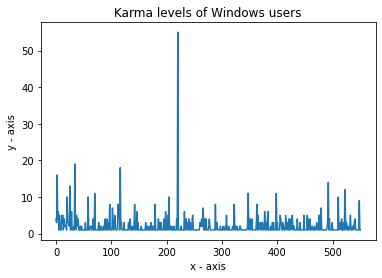

In [4]:
# importing the required module
import matplotlib.pyplot as plt
 
# x axis values
x = range(len(win_karma_levels))
# corresponding y axis values
y = list(win_karma_levels.values())


plt.plot(x, y)
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
 
# giving a title to my graph
plt.title('Karma levels of Windows users')
 

# function to show the plot
plt.show()

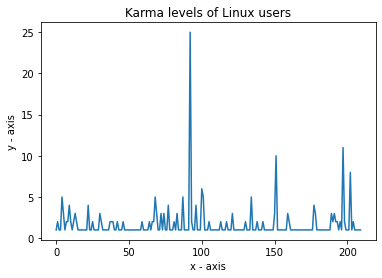

In [5]:
# importing the required module
import matplotlib.pyplot as plt
 
# x axis values
x = range(len(lin_karma_levels))
# corresponding y axis values
y = list(lin_karma_levels.values())


plt.plot(x, y)
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
 
# giving a title to my graph
plt.title('Karma levels of Linux users')
 

# function to show the plot
plt.show()

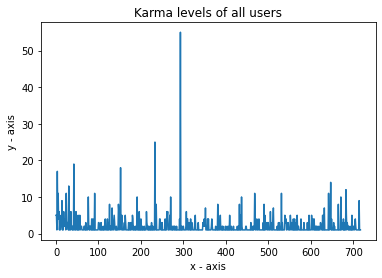

In [6]:
# importing the required module
import matplotlib.pyplot as plt
 
# x axis values
x = range(len(karma_levels))
# corresponding y axis values
y = list(karma_levels.values())


plt.plot(x, y)
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
 
# giving a title to my graph
plt.title('Karma levels of all users')
 

# function to show the plot
plt.show()

### Politeness and Reputation

##### function to divide counts

In [11]:
def get_points(d):
  y = list(d.keys())
  x = list(d.values())
  count = 0
  for i in x:
    count += i
  count = int(count/3)
  print(count*3)
  count2 = 0
  for i in range(len(x)):
    if(count2 < count and count2 + x[i] >= count):
        print(y[i+1])
    if(count2 < count*2 and count2 + x[i] >= count*2):
        print(y[i+1])
    if(count2 < count*3 and count2 + x[i] >= count*3):
        print(y[i])
    count2 += x[i]
  

In [8]:
get_points(win_karma_levels)

1218
604
4477
1509366


In [9]:
get_points(lin_karma_levels)

357
414
2461
590530


In [12]:
get_points(karma_levels)

1578
539
3854
1556427


#### results

In [13]:
win_score = [0, 0, 0]
win_count = [0, 0, 0]
for i in range(len(win_karma_score)):
  if (win_karma_score[i] >= 2 and win_karma_score[i] <= 604):
    win_count[0] += 1
    if (win_politeness_score[i] == 0):
      win_score[0] += 1
  if (win_karma_score[i] >= 604 and win_karma_score[i] <= 4477):
    win_count[1] += 1
    if (win_politeness_score[i] == 0):
      win_score[1] += 1
  if (win_karma_score[i] >= 4477 and win_karma_score[i] <= 1509366):
    win_count[2] += 1
    if (win_politeness_score[i] == 0):
      win_score[2] += 1

print("Windows:")
print("Low rep =" + str(win_score[0]/win_count[0]))
print("Middle rep =" + str(win_score[1]/win_count[1]))
print("High rep =" + str(win_score[2]/win_count[2]))

Windows:
Low rep =0.7886977886977887
Middle rep =0.6992665036674817
High rep =0.8246913580246914


In [15]:
lin_score = [0, 0, 0]
lin_count = [0, 0, 0]
for i in range(len(lin_karma_score)):
  if (lin_karma_score[i] >= 2 and lin_karma_score[i] <= 414):
    lin_count[0] += 1
    if (lin_politeness_score[i] == 0):
      lin_score[0] += 1
  if (lin_karma_score[i] >= 414 and lin_karma_score[i] <= 2461):
    lin_count[1] += 1
    if (lin_politeness_score[i] == 0):
      lin_score[1] += 1
  if (lin_karma_score[i] >= 2461 and lin_karma_score[i] <= 590530):
    lin_count[2] += 1
    if (lin_politeness_score[i] == 0):
      lin_score[2] += 1

print("Linux:")
print("Low rep =" + str(lin_score[0]/lin_count[0]))
print("Middle rep =" + str(lin_score[1]/lin_count[1]))
print("High rep =" + str(lin_score[2]/lin_count[2]))

Linux:
Low rep =0.8083333333333333
Middle rep =0.6611570247933884
High rep =0.75


In [16]:
score = [0, 0, 0]
count = [0, 0, 0]
for i in range(len(karma_score)):
  if (karma_score[i] >= 2 and karma_score[i] <= 539):
    count[0] += 1
    if (politeness_score[i] == 0):
      score[0] += 1
  if (karma_score[i] >= 539 and karma_score[i] <= 3854):
    count[1] += 1
    if (politeness_score[i] == 0):
      score[1] += 1
  if (karma_score[i] >= 3854 and karma_score[i] <= 1556427):
    count[2] += 1
    if (politeness_score[i] == 0):
      score[2] += 1

print("Overall:")
print("Low rep =" + str(score[0]/count[0]))
print("Middle rep =" + str(score[1]/count[1]))
print("High rep =" + str(score[2]/count[2]))

Overall:
Low rep =0.7912713472485768
Middle rep =0.696969696969697
High rep =0.8041825095057035
